# Variability

## Remarks
- This describes how spread out (i.e. dispersed) the data points in a dataset are.
- This help us understand how much the values differ from each other and from the central tendency (e.g. mean).
- Common metrics of variability are **Range**, **Variance**, **Standard Deviation (SD)**, and **Interquatile Range(IQR)**. 

## Implementation

,Day,Sales
0,1,152
1,2,142
2,3,64
3,4,156
4,5,121


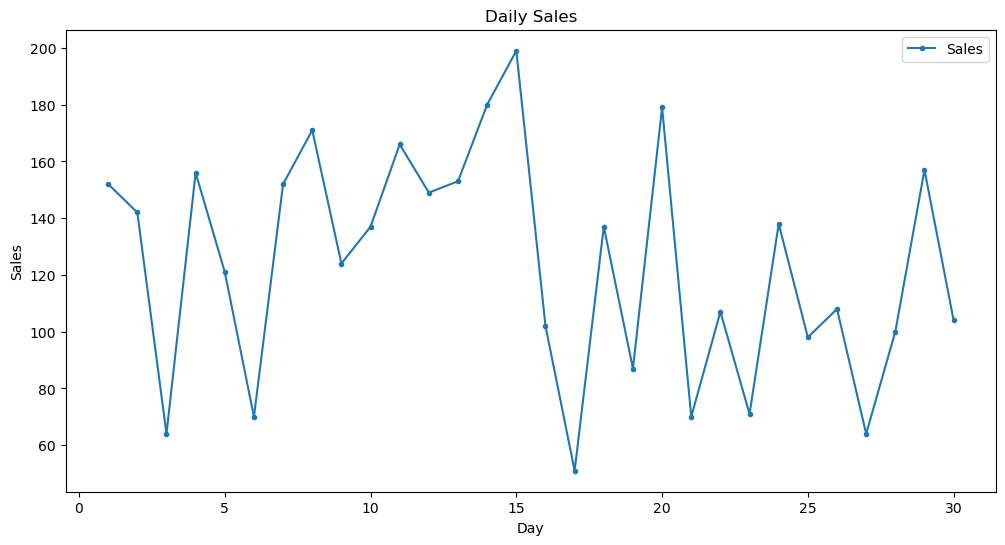

In [23]:
import numpy as np
import pandas as pd

#. Create dataset: daily sales
np.random.seed(42)
sales = np.random.randint(50, 200, size=30)
data = pd.DataFrame({"Day": range(1,31), "Sales": sales})

#. Display data
display( data.head() )

#. Plot sales
ax = data.plot(x="Day", y="Sales", marker='.', figsize=(12,6))
ax.set(title="Daily Sales", xlabel="Day", ylabel="Sales");

### Range

This metric is quick and simple, but sensitive to outliers.

In [29]:
#. Calculate range and print result
range_sales = data["Sales"].max() - data["Sales"].min()
print(f"Range sales: { range_sales }")

Range sales: 148


### Variance

Useful for understanding how data points deviate from the mean.

This one might be hard to interpret since the unit is squared.

In [32]:
#. Calculate variance and print result
variance_sales = data["Sales"].var()
print(f"Variance sales: { variance_sales }")

Variance sales: 1620.3091954022987


### Standard Deviation (SD)

Useful for understanding how data points deviate from the mean.

It is easier to interpret than variance since it keeps the same unit.

In [35]:
#. Calculate standard deviation and print result
std_sales = data["Sales"].std()
print(f"Standard deviation sales: { std_sales }")

Standard deviation sales: 40.253064422504515


### Interquatile Range (IQR)

We can use it when the data is skewed or contains outliers.

One good example of IQR is analyzing salaries to identify typical pay ranges 
without being affected by outliers (e.g. CEOs salaries)

In [47]:
#. Calculate quantiles and print results
sales_q25 = data["Sales"].quantile(0.25)
sales_q75 = data["Sales"].quantile(0.75)
iqr_sales = sales_q75 - sales_q25
print(f"IQR sales: { iqr_sales }")

IQR sales: 54.25
